Import Libraries

In [37]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import clone
from sklearn.decomposition import PCA

from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier





Import Data

In [3]:
trainingData=pd.read_csv('data/train.csv', index_col='id')
#testingData=pd.read_csv('data/test.csv', index_col='id')

testingData=pd.read_csv('data/test.csv', index_col='id')
#testingData=pd.read_csv('data/test.csv', index_col='id')

#View All Data Columns
pd.set_option('display.max_columns',None)

In [4]:
trainingData.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
id,,,,,,,,,,,,,,,,,,,,,,
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,0.09,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,0.05,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,0.07,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,0.03,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,0.02,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [5]:
testingData.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
id,,,,,,,,,,,,,,,,,,,,,
101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,22636.74,0.27,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,14482.46,0.22,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,116160.08,1.28,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,16135.47,0.29,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,2624.49,0.08,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


In [6]:
print("********** Checking missing values in Training Data **************** :",trainingData.isna().sum(),"\n ********************Checking complete***")
print("******************")
print("********** Checking missing values in Testing Data **************** :",testingData.isna().sum(),"\n ********************Checking complete***")

********** Checking missing values in Training Data **************** : loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64 
 ********************Checking complete***
******************
********** Checking missing values in Testing Data **************** : loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lO

In [7]:
#Checking duplicates values
print("********** Checking duplicates in training Data **************** :",trainingData.duplicated().sum()," \n ******Checking complete*** \n")

print("********** Checking duplicates in Testing Data **************** :",testingData.duplicated().sum()," \n ******Checking complete***")

********** Checking duplicates in training Data **************** : 0  
 ******Checking complete*** 

********** Checking duplicates in Testing Data **************** : 0  
 ******Checking complete***


In [8]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101762
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loc                101763 non-null  float64
 1   v(g)               101763 non-null  float64
 2   ev(g)              101763 non-null  float64
 3   iv(g)              101763 non-null  float64
 4   n                  101763 non-null  float64
 5   v                  101763 non-null  float64
 6   l                  101763 non-null  float64
 7   d                  101763 non-null  float64
 8   i                  101763 non-null  float64
 9   e                  101763 non-null  float64
 10  b                  101763 non-null  float64
 11  t                  101763 non-null  float64
 12  lOCode             101763 non-null  int64  
 13  lOComment          101763 non-null  int64  
 14  lOBlank            101763 non-null  int64  
 15  locCodeAndComment  101763 non-null  int64  
 16  un

Training Data Distribution

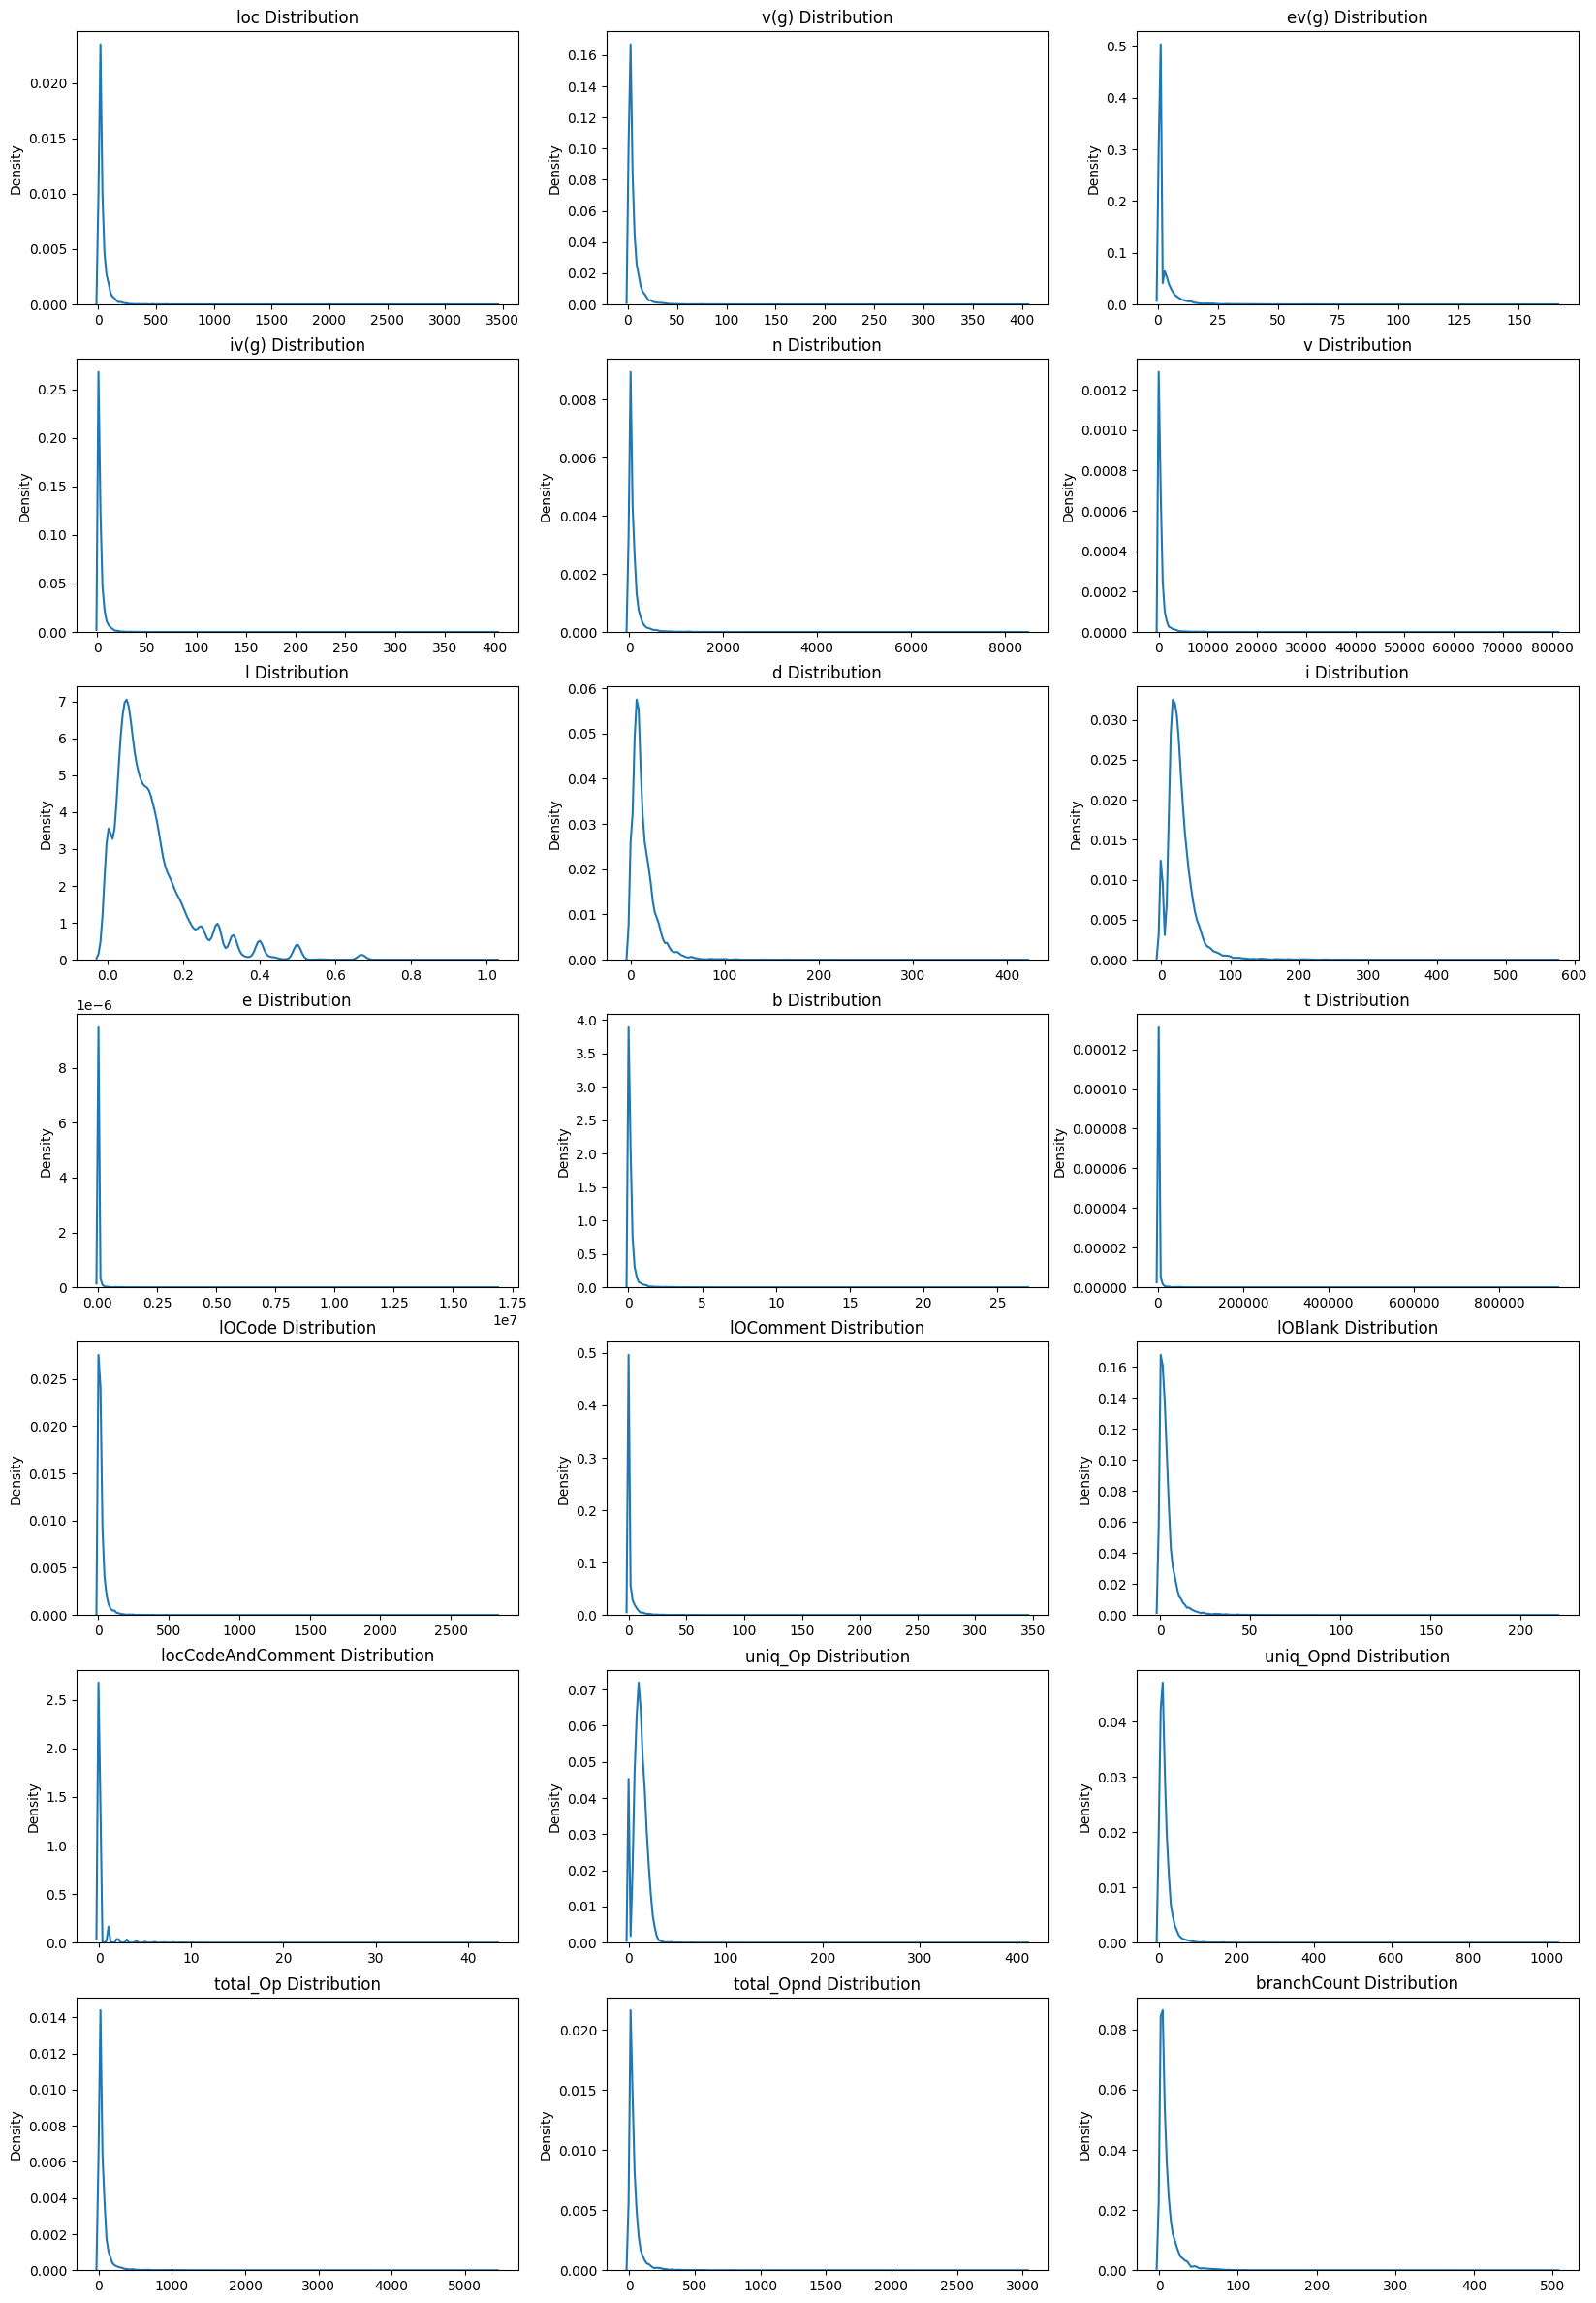

In [9]:
data = trainingData.copy()
label = data.pop('defects')
fig, ax = plt.subplots(7,3,figsize=(20,30))
ax = ax.flatten()
for i, column in enumerate(data):
    sns.kdeplot(data[column],ax=ax[i])
    ax[i].set_title(f"{column} Distribution")
    ax[i].set_xlabel(None)
plt.show()

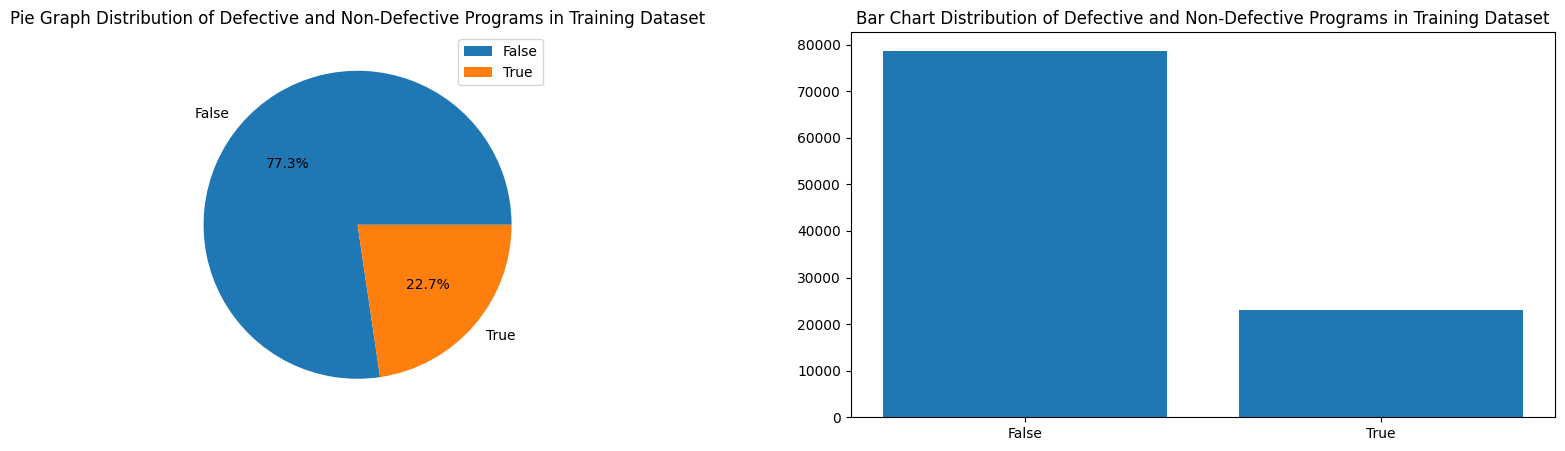

Total Number of Values: 101763
Number of Programs with Defects: 23064
Number of Programs without Defects:78699


In [10]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax.flatten()
ax[0].pie([trainingData['defects'].value_counts()[False],trainingData['defects'].value_counts()[True]],labels=["False","True"],autopct='%1.1f%%')
ax[0].legend()
ax[0].set_title("Pie Graph Distribution of Defective and Non-Defective Programs in Training Dataset")

ax[1].bar(["False","True"],[trainingData['defects'].value_counts()[False],trainingData['defects'].value_counts()[True]])
ax[1].set_title("Bar Chart Distribution of Defective and Non-Defective Programs in Training Dataset")
plt.show()

print(f"Total Number of Values: {trainingData['defects'].count()}")
print(f"Number of Programs with Defects: {trainingData['defects'].value_counts()[True]}")
print(f"Number of Programs without Defects:{trainingData['defects'].value_counts()[False]}")

Correlation Data

In [11]:
correlations = trainingData.corr()

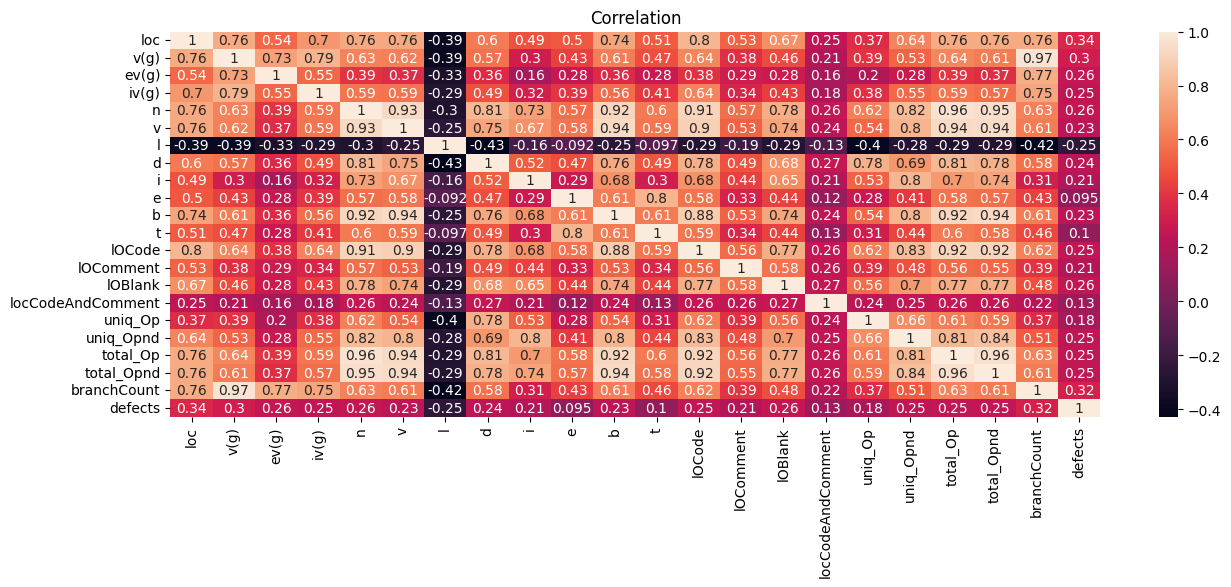

In [12]:
plt.figure(figsize=(15,5))
plt.title("Correlation")
sns.heatmap(correlations,annot=True,annot_kws = {'size' : 10})
plt.show()

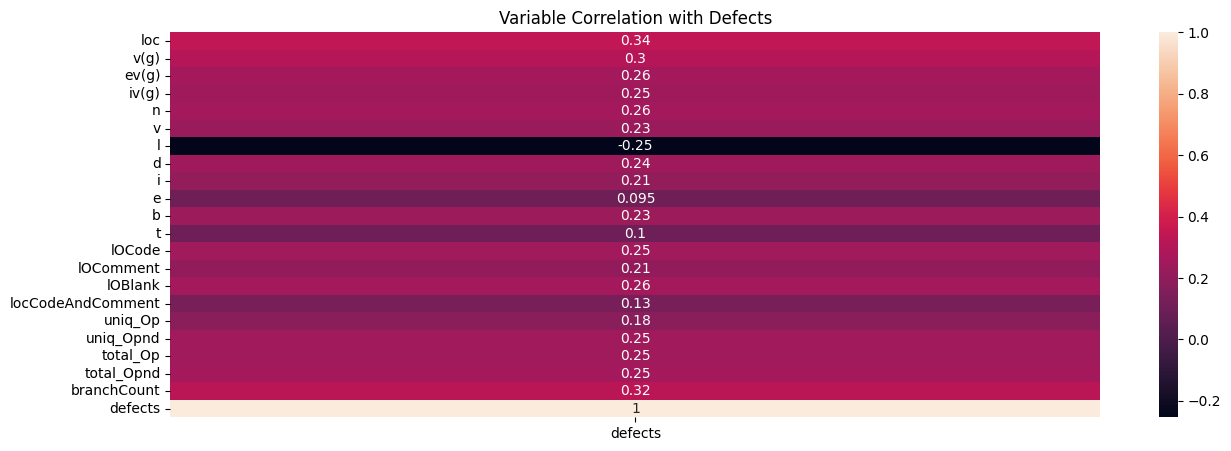

In [13]:
plt.figure(figsize=(15,5))
plt.title("Variable Correlation with Defects")
sns.heatmap(correlations[['defects']], annot=True)
plt.show()

In [14]:
# Replace False with 0 and True with 1 in the 'defects' column
trainingData['defects'] = trainingData['defects'].map({False: 0, True: 1})


Feature Selection

In [15]:
# Create a function to calculate VIF for all variables
threshold = 10
def calculate_vif(data_frame):
    to_drop = []
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) 
                       for i in range(data_frame.shape[1])]
     
    for i in range(vif_data.shape[0]):
          vif = vif_data.loc[i, "VIF"]
                        
          if vif > threshold:
            to_drop.append(vif_data.loc[i, "Variable"])
    return vif_data, to_drop
# Calculate VIF for the train dataset
vif_values, to_drop = calculate_vif(trainingData)

print("VIF Values for Training set:")
print(vif_values)

VIF Values for Training set:
             Variable        VIF
0                 loc   7.023452
1                v(g)  29.890746
2               ev(g)   3.738180
3               iv(g)   4.459707
4                   n  24.689889
5                   v  15.384746
6                   l   1.851483
7                   d  11.538139
8                   i   9.407622
9                   e   3.155956
10                  b  13.471010
11                  t   3.195427
12             lOCode  13.930293
13          lOComment   1.798953
14            lOBlank   4.546524
15  locCodeAndComment   1.160908
16            uniq_Op  11.277786
17          uniq_Opnd  10.462470
18           total_Op  28.514891
19         total_Opnd  28.862118
20        branchCount  30.729084
21            defects   1.535713


In [16]:
# Print out the columns to be dropped
print("The following columns have high VIF and will be dropped:")
print(to_drop)

# Drop the columns from the train and test sets
trainingData_cleaned = trainingData.drop(to_drop, axis=1)
testingData_cleaned = testingData.drop(to_drop, axis=1)

print("\n Training Data (Cleaned):")
print(trainingData_cleaned.head())

print("\n Testing Data (Cleaned):")
print(testingData_cleaned.head())

The following columns have high VIF and will be dropped:
['v(g)', 'n', 'v', 'd', 'b', 'lOCode', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']

 Training Data (Cleaned):
     loc  ev(g)  iv(g)     l      i        e       t  lOComment  lOBlank  \
id                                                                         
0   22.0    1.0    2.0  0.06  14.25  5448.79  302.71          1        1   
1   14.0    1.0    2.0  0.14  21.11   936.71   52.04          0        1   
2   11.0    1.0    2.0  0.11  22.76  1754.01   97.45          0        1   
3    8.0    1.0    1.0  0.19  17.86   473.66   26.31          0        2   
4   11.0    1.0    2.0  0.18  12.44   365.67   20.31          0        2   

    locCodeAndComment  defects  
id                              
0                   0        0  
1                   0        0  
2                   0        0  
3                   0        1  
4                   0        0  

 Testing Data (Cleaned):
          loc  ev(g)  

Outllier Detection and Standardization

In [17]:
# Splitting the data into features (X) and the target variable (y)
X_train = trainingData_cleaned.drop(columns=["defects"])
y_train = trainingData_cleaned.defects


/tmp/ipykernel_4282/4280318044.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


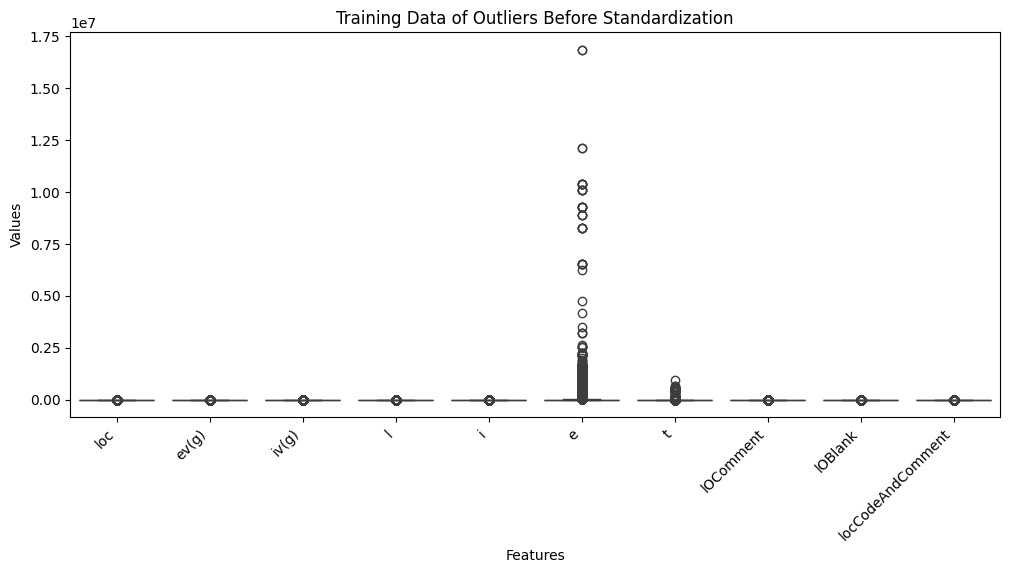

/tmp/ipykernel_4282/4280318044.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


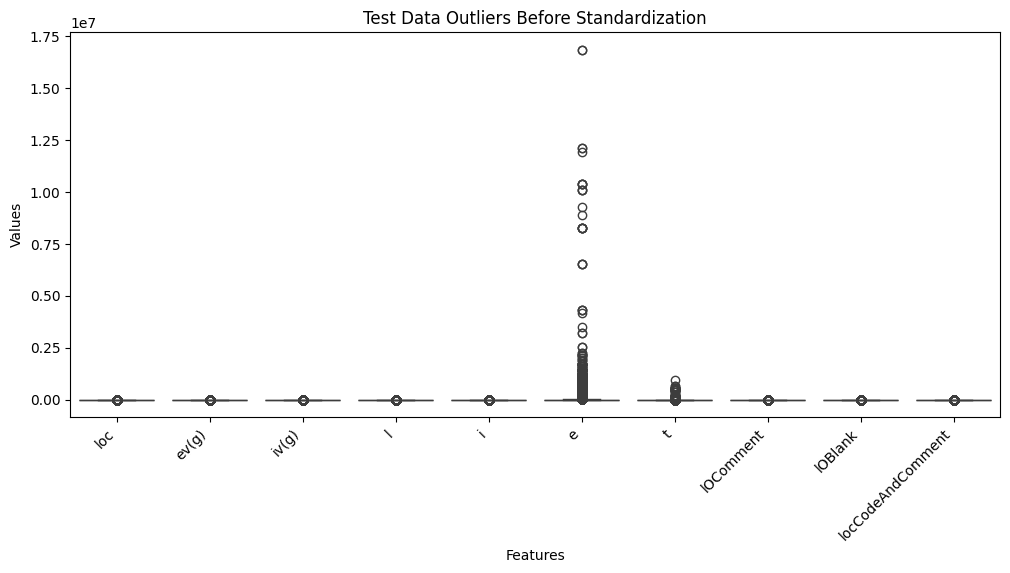

In [18]:

#Before Standardization

# Define a function to draw boxplots with outliers marked
def draw_boxplot_with_outliers(data, title):
    plt.figure(figsize=(12, 5))
    ax = sns.boxplot(data=data, showfliers=True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.show()

draw_boxplot_with_outliers(X_train, title='Training Data of Outliers Before Standardization')
draw_boxplot_with_outliers(testingData_cleaned, title='Test Data Outliers Before Standardization')


/tmp/ipykernel_4282/1849473018.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


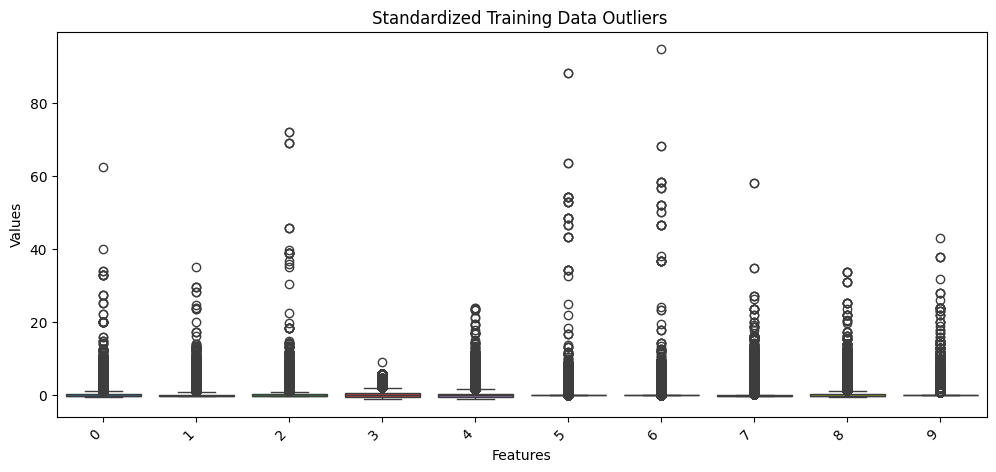

/tmp/ipykernel_4282/1849473018.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


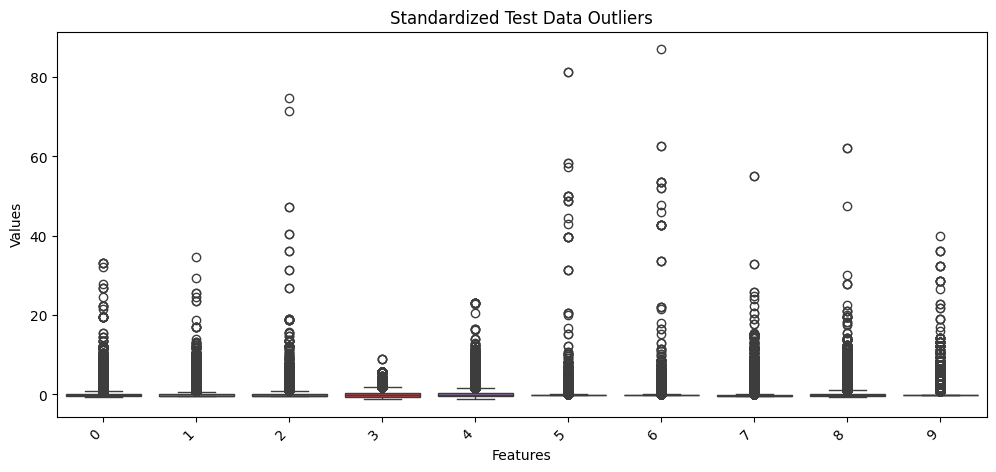

In [19]:
# Define a function to draw boxplots with outliers marked
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
TestingData_cleaned_standardized = scaler.fit_transform(testingData_cleaned)
    
def draw_boxplot_with_outliers(data, title):

    plt.figure(figsize=(12, 5))
    ax = sns.boxplot(data=data, showfliers=True)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.show()

draw_boxplot_with_outliers(X_train, title='Standardized Training Data Outliers ')
draw_boxplot_with_outliers(TestingData_cleaned_standardized, title='Standardized Test Data Outliers')

Cross Validation for Finding the Best Model

In [38]:
#Calculates Each Model's Training and Validation ROC AUC Scores for Each Fold
#Display the mean ROC AUC scores (Training and Validation Scores)
def crossValidation(X, Y, model, model_name, rskf):
    #Copy Training Data to prevent modification
    X_copy = X.copy()
    Y_copy = Y.copy()
    
    #Initialize Scores and Validation Predictions
    training_scores, validation_scores, accuracy_scores, f1_scores=[],[],[],[]
    validation_predictions = np.zeros((len(X_copy)))
    
    for i, (train_index, validation_index) in enumerate(rskf.split(X,Y)):
        
        #Clone the model to prevent modification of input model
        m = clone(model)
        
        #Define Training and Validation Sets
        training_X, validation_X = X_copy[train_index], X_copy[validation_index]
        training_Y, validation_Y = Y_copy[train_index], Y_copy[validation_index]
        
        #Fit Model
        m.fit(training_X,training_Y)
        predicted_Y = m.predict(validation_X) 
        
        accuracy = accuracy_score(predicted_Y, validation_Y)
        f1 = f1_score(predicted_Y, validation_Y)
        
        training_prediction = m.predict_proba(training_X)[:,1]
        validation_prediction = m.predict_proba(validation_X)[:,1]

        validation_predictions[validation_index] += validation_prediction
        
        training_score = roc_auc_score(training_Y,training_prediction)
        validation_score = roc_auc_score(validation_Y, validation_prediction)
        
        training_scores.append(training_score)
        validation_scores.append(validation_score)
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
    print(f"Training Score: {np.round(np.mean(training_scores),decimals=6)}\tValidation Score: {np.round(np.mean(validation_scores),decimals=6)}\tAccuracy: {np.round(np.mean(accuracy_scores),decimals=6)}\tF1 Score: {np.round(np.mean(f1_scores),decimals=6)}\tModel: {model_name}")

    return validation_scores
    

In [21]:
#Seed for Repetition
seed = 10
np.random.seed(seed)

#Create a Repeated K-Fold Cross Validator
rskf = RepeatedStratifiedKFold(random_state=seed)

validation_scores = pd.DataFrame()

models = [
    ('gaussian_nb', GaussianNB()),
    ('bernoulli_nb', BernoulliNB()),
    ('knn', KNeighborsClassifier()),
    ('logistic_regression', LogisticRegression(random_state = seed)),
    ('random_forest', RandomForestClassifier(random_state = seed)),
    ('gradient_boosting', GradientBoostingClassifier(random_state = seed)),
    ('hist_gradient_boosting', HistGradientBoostingClassifier(random_state = seed)),
    ('lgbm', LGBMClassifier(random_state = seed)),
    ('xgb', XGBClassifier(random_state = seed)),
    ('cat_boost', CatBoostClassifier(random_state = seed,verbose=0)),
]

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in models:
    validation_scores[model_name] = crossValidation(X_train, y_train, 
                                                    make_pipeline(model),
                                                    model_name, rskf)
    

Training Score: 0.7671589414807385	Validation Score: 0.7671437082975945	Model: gaussian_nb
Training Score: 0.7609310211496303	Validation Score: 0.7608771331506685	Model: bernoulli_nb
Training Score: 0.8840459888588512	Validation Score: 0.7194356174539628	Model: knn
Training Score: 0.7781648029077133	Validation Score: 0.7780576374897299	Model: logistic_regression
Training Score: 0.998541075378897	Validation Score: 0.7591139978891641	Model: random_forest
Training Score: 0.7948394332805709	Validation Score: 0.7906932218965563	Model: gradient_boosting
Training Score: 0.8028327316937758	Validation Score: 0.7906571589841793	Model: hist_gradient_boosting
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1378
[LightGBM] [I

<Axes: title={'center': 'Validation Scores'}>

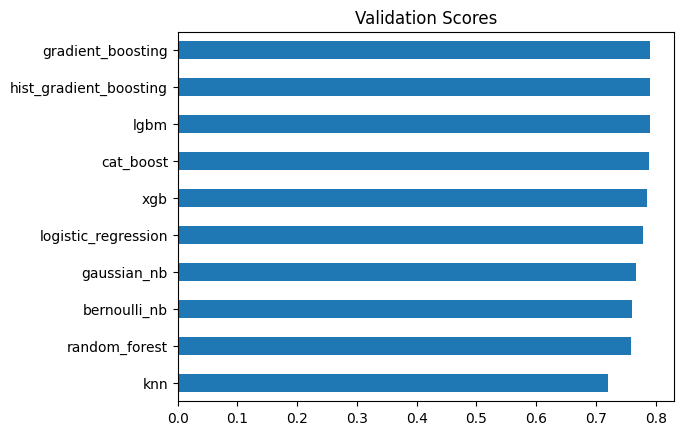

In [22]:
#Plot the Mean of the Validation Scores for Each Model 
validation_scores.mean().sort_values().plot(kind="barh",title="Validation Scores")

Optimize Gaussian NB Through Var_Smoothing

In [39]:
GNB = []
varSmooth = np.logspace(0,-9, num=100)
for i in range(100):
    GNB.append(('GaussianNB_VS_'+str(varSmooth[i]), GaussianNB(var_smoothing=varSmooth[i])),)


#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in GNB:
    crossValidation(X_train, y_train, 
                                                    make_pipeline(model),
                                                    model_name, rskf)

Training Score: 0.770393	Validation Score: 0.77038	Accuracy: 0.792576	F1 Score: 0.258781	Model: GaussianNB_VS_1.0
Training Score: 0.770116	Validation Score: 0.770104	Accuracy: 0.793942	F1 Score: 0.27559	Model: GaussianNB_VS_0.8111308307896871
Training Score: 0.769824	Validation Score: 0.769813	Accuracy: 0.795158	F1 Score: 0.290013	Model: GaussianNB_VS_0.657933224657568
Training Score: 0.769529	Validation Score: 0.769518	Accuracy: 0.796183	F1 Score: 0.303381	Model: GaussianNB_VS_0.533669923120631
Training Score: 0.769244	Validation Score: 0.769233	Accuracy: 0.796968	F1 Score: 0.315134	Model: GaussianNB_VS_0.4328761281083058
Training Score: 0.768976	Validation Score: 0.768964	Accuracy: 0.797465	F1 Score: 0.324991	Model: GaussianNB_VS_0.35111917342151305
Training Score: 0.768725	Validation Score: 0.768713	Accuracy: 0.797813	F1 Score: 0.333417	Model: GaussianNB_VS_0.28480358684358015
Training Score: 0.768499	Validation Score: 0.768487	Accuracy: 0.798386	F1 Score: 0.341756	Model: GaussianNB

Bernoulli NB Optimization

In [43]:
BNB = []
a = [.00001,.0001,.001,.01,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1]
for i in range(len(a)):
    BNB.append(('BernoulliNB_Alpha_'+str(a[i]), BernoulliNB(alpha=a[i])),)


#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in BNB:
    crossValidation(X_train, y_train, 
                                                    make_pipeline(model),
                                                    model_name, rskf)

Training Score: 0.760931	Validation Score: 0.760877	Accuracy: 0.769274	F1 Score: 0.531726	Model: BernoulliNB_Alpha_1e-05
Training Score: 0.760931	Validation Score: 0.760877	Accuracy: 0.769274	F1 Score: 0.531726	Model: BernoulliNB_Alpha_0.0001
Training Score: 0.760931	Validation Score: 0.760877	Accuracy: 0.769274	F1 Score: 0.531726	Model: BernoulliNB_Alpha_0.001
Training Score: 0.760931	Validation Score: 0.760877	Accuracy: 0.769274	F1 Score: 0.531726	Model: BernoulliNB_Alpha_0.01
Training Score: 0.760931	Validation Score: 0.760877	Accuracy: 0.769274	F1 Score: 0.531726	Model: BernoulliNB_Alpha_0.1
Training Score: 0.760931	Validation Score: 0.760877	Accuracy: 0.769274	F1 Score: 0.531726	Model: BernoulliNB_Alpha_0.15
Training Score: 0.760931	Validation Score: 0.760877	Accuracy: 0.769274	F1 Score: 0.531726	Model: BernoulliNB_Alpha_0.2
Training Score: 0.760931	Validation Score: 0.760877	Accuracy: 0.769274	F1 Score: 0.531726	Model: BernoulliNB_Alpha_0.25
Training Score: 0.760931	Validation Sc

KNN Optimization

In [44]:
KNN = []
for i in range(1,11):
    KNN.append(('KNN_Neighbors_'+str(i), KNeighborsClassifier(n_neighbors=i)),)


#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in KNN:
    crossValidation(X_train, y_train, 
                                                    make_pipeline(model),
                                                    model_name, rskf)

Training Score: 0.942743	Validation Score: 0.664517	Accuracy: 0.781714	F1 Score: 0.314088	Model: KNN_Neighbors_2
Training Score: 0.916357	Validation Score: 0.69102	Accuracy: 0.773784	F1 Score: 0.436493	Model: KNN_Neighbors_3
Training Score: 0.89775	Validation Score: 0.707928	Accuracy: 0.791298	F1 Score: 0.372923	Model: KNN_Neighbors_4
Training Score: 0.884046	Validation Score: 0.719436	Accuracy: 0.789023	F1 Score: 0.449514	Model: KNN_Neighbors_5
Training Score: 0.873507	Validation Score: 0.728073	Accuracy: 0.797161	F1 Score: 0.401984	Model: KNN_Neighbors_6
Training Score: 0.865072	Validation Score: 0.734445	Accuracy: 0.796643	F1 Score: 0.45752	Model: KNN_Neighbors_7
Training Score: 0.85831	Validation Score: 0.739245	Accuracy: 0.800997	F1 Score: 0.419832	Model: KNN_Neighbors_8
Training Score: 0.852764	Validation Score: 0.743564	Accuracy: 0.800797	F1 Score: 0.462313	Model: KNN_Neighbors_9
Training Score: 0.848137	Validation Score: 0.747184	Accuracy: 0.802926	F1 Score: 0.42959	Model: KNN_

KeyboardInterrupt: 

Logistic Regression

In [47]:
solvers = ['lbfgs', 'newton-cg','liblinear']
c_values = [.01, .1, 1.0, 10, 100]

LGR = []

for s in range(3):
    for c in range(5):
        LGR.append(('logistic_regression_solver_'+str(solvers[s])+'_c_'+str(c_values[c]), LogisticRegression(random_state=seed, solver=solvers[s],C=c_values[c]),))
    


#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in LGR:
    crossValidation(X_train, y_train, make_pipeline(model),model_name, rskf)

Training Score: 0.778166	Validation Score: 0.778059	Accuracy: 0.806751	F1 Score: 0.371218	Model: logistic_regression_solver_newton-cg_c_100
Training Score: 0.778166	Validation Score: 0.778059	Accuracy: 0.806751	F1 Score: 0.371218	Model: logistic_regression_solver_newton-cg_c_10


/home/auraeboros/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/auraeboros/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Training Score: 0.778165	Validation Score: 0.778058	Accuracy: 0.806749	F1 Score: 0.371187	Model: logistic_regression_solver_newton-cg_c_1.0
Training Score: 0.778153	Validation Score: 0.778046	Accuracy: 0.806693	F1 Score: 0.37073	Model: logistic_regression_solver_newton-cg_c_0.1
Training Score: 0.778038	Validation Score: 0.777932	Accuracy: 0.806215	F1 Score: 0.36643	Model: logistic_regression_solver_newton-cg_c_0.01
Training Score: 0.778166	Validation Score: 0.778059	Accuracy: 0.806753	F1 Score: 0.371224	Model: logistic_regression_solver_lbfgs_c_100
Training Score: 0.778166	Validation Score: 0.778059	Accuracy: 0.806753	F1 Score: 0.371224	Model: logistic_regression_solver_lbfgs_c_10
Training Score: 0.778165	Validation Score: 0.778058	Accuracy: 0.806746	F1 Score: 0.37118	Model: logistic_regression_solver_lbfgs_c_1.0
Training Score: 0.778153	Validation Score: 0.778046	Accuracy: 0.806694	F1 Score: 0.370736	Model: logistic_regression_solver_lbfgs_c_0.1
Training Score: 0.778038	Validation Sco


Random Forest

In [52]:
max_depth = [3,5,7,9]
max_features = ['none','log2', 'sqrt'] # number of features in consideration at every split


RF = [('random_forest',RandomForestClassifier(random_state=seed))]

for i in range(4):
    for j in range(3):
        RF.append(('random_forest_maxDepth_'+str(max_depth[i])+'_maxFeatures_'+max_features[j], RandomForestClassifier(random_state=seed,max_depth=max_depth[i],max_features=max_features[j]),))
    


#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in RF:
    crossValidation(X_train, y_train, make_pipeline(model),model_name, rskf)

KeyboardInterrupt: 

Hist Gradient Boosting

In [ ]:
from scipy.stats import loguniform
max_depth = [3,5,7,9]
learning_rate = loguniform(.01,1)
HGB =[('hist_gradient_boosting',HistGradientBoostingClassifier(random_state = seed))]
for i in range(len(learning_rate)):
    for j in range(len(max_depth)):
        HGB.append(('hist_gradient_boosting_lr_'+learning_rate[i]+'_depth_'+max_depth[j],HistGradientBoostingClassifier(random_state = seed,learning_rate=learning_rate[i],max_depth=max_depth[j])))    

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in HGB:
    crossValidation(X_train, y_train, 
                                                    make_pipeline(model),
                                                    model_name, rskf)

LGBM

In [55]:
max_depth = [3,5,7,9]

LGBM =[('lgbm',LGBMClassifier(random_state = seed))]
for i in range(len(max_depth)):
    LGBM.append(('lgbm_maxDepth_'+str(max_depth[i])+'_leafNum_'+str(2**max_depth[i]),LGBMClassifier(random_state = seed,max_depth=max_depth[i],num_leaves=2**max_depth[i])))    

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in LGBM:
    crossValidation(X_train, y_train, 
                                                    make_pipeline(model),
                                                    model_name, rskf)

[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1378
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226643 -> initscore=-1.227365
[LightGBM] [Info] Start training from score -1.227365
[LightGBM] [Info] Number of positive: 18451, number of negative: 62959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 10
[LightGBM] [Info] 

KeyboardInterrupt: 

Decision Tree Model Optimization

In [25]:
criterion =['gini','entropy']
depth = [3,5,7,9]

DT =[]
for i in range(2):
    DT.append(('decision_tree_'+criterion[i],DecisionTreeClassifier(random_state=seed,criterion=criterion[i])))
    for j in range(4):
        DT.append(('decision_tree_'+criterion[i]+'_depth_'+depth[j],DecisionTreeClassifier(random_state=seed,criterion=criterion[i],max_depth=depth[j])))    

#Calculate the training and validation ROC AUC scores for each model using the standardized training dataset 
for (model_name, model) in DT:
    crossValidation(X_train, y_train, 
                                                    make_pipeline(model),
                                                    model_name, rskf)

Training Score: 0.9995710985633387	Validation Score: 0.613855395813125	Model: decision_treeG
Training Score: 0.761916571847356	Validation Score: 0.7611896090224073	Model: decision_treeG2
Training Score: 0.7800790117868551	Validation Score: 0.7795117738940078	Model: decision_treeG3
Training Score: 0.7850375358702025	Validation Score: 0.7835083173974294	Model: decision_treeG4
Training Score: 0.7876859090286491	Validation Score: 0.7845438052909369	Model: decision_treeG5
Training Score: 0.7904225936599155	Validation Score: 0.7851270427539754	Model: decision_treeG6
Training Score: 0.7938603266483639	Validation Score: 0.7846528559653143	Model: decision_treeG7
Training Score: 0.7977726210857461	Validation Score: 0.7821518466229844	Model: decision_treeG8
Training Score: 0.8030412894291113	Validation Score: 0.7776773717701864	Model: decision_treeG9
Training Score: 0.8097705069198295	Validation Score: 0.7712252859964721	Model: decision_treeG10
Training Score: 0.9995710985633387	Validation Score: